## Part 1: Explore the Data

Import the data and use Pandas to learn more about the dataset.

In [5]:
import pandas as pd

df = pd.read_csv('Resources/client_dataset.csv')

df.head()


,first,last,job,phone,email,client_id,order_id,order_date,order_week,order_year,item_id,category,subcategory,unit_price,unit_cost,unit_weight,qty,line_number
0,Donald,Harding,Immunologist,793-904-7725x39308,harding.donald.7185@sullivan.com,58515,8953482,2023-04-28,17,2023,EUD29711-63-6U,decor,wall art,1096.80,762.71,7.50,105,1
1,Tiffany,Myers,Music therapist,201.442.4543x942,myers.t.6537@ferguson-johnson.net,37609,8069089,2023-05-19,20,2023,XDA18116-89-4A,consumables,pens,24.95,15.09,1.49,21,0
2,Shannon,Watson,Immunologist,687.737.9424x8503,swatson8146@payne.net,57113,1902144,2023-01-29,4,2023,ABE59463-05-7E,software,project management,13.52,7.86,1.68,39,6
3,Nathan,Baker,Accounting technician,827-788-8123x012,bakernathan@benson.com,46554,9031802,2023-04-25,17,2023,ZMM00836-65-0C,consumables,pens,36.42,24.85,1.23,29,3
4,Christina,Schwartz,Chiropractor,265-829-3643,christinaschwartz9252@mcconnell.com,92089,1322274,2023-05-28,21,2023,BZX55559-12-3X,consumables,misc,195.10,108.17,46.43,20,1


In [6]:
# View the column names in the data
df.columns


Index(['first', 'last', 'job', 'phone', 'email', 'client_id', 'order_id',
       'order_date', 'order_week', 'order_year', 'item_id', 'category',
       'subcategory', 'unit_price', 'unit_cost', 'unit_weight', 'qty',
       'line_number'],
      dtype='object')

In [7]:
#Use the describe function to gather some basic statistics
df.describe()


,client_id,order_id,order_week,order_year,unit_price,unit_cost,unit_weight,qty,line_number
count,54639.000000,5.463900e+04,54639.000000,54639.000000,54639.000000,54639.000000,54639.000000,5.463900e+04,54639.000000
mean,54837.869416,5.470190e+06,11.359139,2022.993064,136.267207,99.446073,5.004116,5.702646e+02,2.979667
std,25487.438231,2.599807e+06,7.023499,0.082997,183.873135,133.164267,5.326599,1.879552e+04,2.436320
min,10033.000000,1.000886e+06,1.000000,2022.000000,0.010000,0.010000,0.000000,0.000000e+00,0.000000
25%,33593.000000,3.196372e+06,6.000000,2023.000000,20.800000,14.840000,1.450000,3.200000e+01,1.000000
50%,53305.000000,5.496966e+06,11.000000,2023.000000,68.310000,49.890000,3.240000,6.800000e+01,3.000000
75%,78498.000000,7.733869e+06,17.000000,2023.000000,173.160000,125.570000,6.890000,1.700000e+02,5.000000
max,99984.000000,9.998480e+06,52.000000,2023.000000,1396.230000,846.270000,46.430000,3.958244e+06,9.000000


Most common items:
item_id
MAZ00314-80-8M    148
CEA34197-91-8D    137
AMD45553-07-2X    136
UUE15482-56-0X    136
CXZ25648-03-8X    135
Name: count, dtype: int64


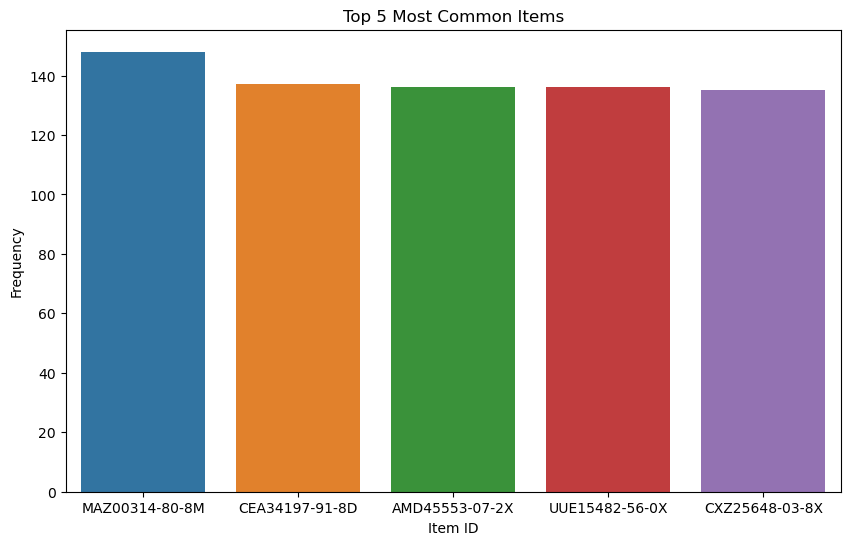


Most common clients:
client_id
33615    220
66037    211
46820    209
38378    207
24741    207
Name: count, dtype: int64


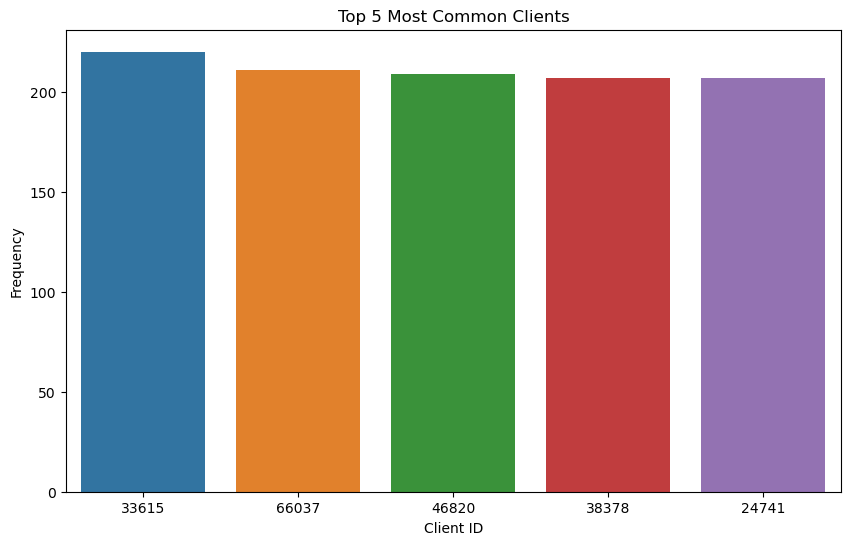

In [8]:
# Use this space to do any additional research
# and familiarize yourself with the data.
##Assisted by ChatGpt

# Most common items in the 'item_id' column
most_common_items = df['item_id'].value_counts().head()
print("Most common items:")
print(most_common_items)

# Visualize the distribution of 'item_id'
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(x='item_id', data=df, order=df['item_id'].value_counts().index[:5])
plt.title('Top 5 Most Common Items')
plt.xlabel('Item ID')
plt.ylabel('Frequency')
plt.show()

# Most common 'client_id'
most_common_clients = df['client_id'].value_counts().head()
print("\nMost common clients:")
print(most_common_clients)

# Visualize the distribution of 'client_id'
plt.figure(figsize=(10, 6))
sns.countplot(x='client_id', data=df, order=df['client_id'].value_counts().index[:5])
plt.title('Top 5 Most Common Clients')
plt.xlabel('Client ID')
plt.ylabel('Frequency')
plt.show()

In [9]:
# What three item categories had the most entries?
df["category"].value_counts().head(3)


category
consumables    23538
furniture      11915
software        8400
Name: count, dtype: int64

In [10]:
# For the category with the most entries,
# which subcategory had the most entries?
df.loc[df["category"] == "consumables", "subcategory"].value_counts().head()
                                                                

subcategory
bathroom supplies    6424
paper products       5874
kitchen supplies     5746
misc                 2891
pens                 2603
Name: count, dtype: int64

In [11]:
# Which five clients had the most entries in the data?
df["client_id"].value_counts().head(5)





client_id
33615    220
66037    211
46820    209
38378    207
24741    207
Name: count, dtype: int64

In [12]:
# Store the client ids of those top 5 clients in a list.
top_5_clients = list(df["client_id"].value_counts().head(5).index)
top_5_clients

[33615, 66037, 46820, 38378, 24741]

In [13]:
# How many total units (the qty column) did the
# client with the most entries order order?
df.loc[df["client_id"] == 33615, "qty"].sum()


64313

## Part 2: Transform the Data
Do we know that this client spent the more money than client 66037? If not, how would we find out? Transform the data using the steps below to prepare it for analysis.

In [14]:
# Create a column that calculates the 
# subtotal for each line using the unit_price
# and the qty
df["subtotal"] = df["unit_price"] * df["qty"]

df[["qty","unit_price","subtotal"]].head()

,qty,unit_price,subtotal
0,105,1096.80,115164.00
1,21,24.95,523.95
2,39,13.52,527.28
3,29,36.42,1056.18
4,20,195.10,3902.00


In [15]:
# Create a column for shipping price
# Assume a shipping price of $7 per pound for orders over 50 pounds
# and $10 per pound for items 50 pounds or under


# Define a function to calculate the shipping price based on the total weight
def calculate_shipping_price(total_weight):
    if total_weight > 50:
        shipping_price = total_weight * 7
    else:
        shipping_price = total_weight * 10
    return shipping_price

# Calculate the total weight for each order
df["total_weight"] = df["unit_weight"] * df["qty"]

# Apply the calculate_shipping_price function to each row and create a new column "shipping_price"
df["shipping_price"] = df["total_weight"].apply(calculate_shipping_price)
#df["shipping_price($)"] = df["shipping_price($)"].apply(lambda x: "${:,.2f}".format(x))

# Display relevant columns
relevant_columns = ["unit_price", "unit_weight", "qty", "total_weight", "shipping_price"]
df[relevant_columns].head()


,unit_price,unit_weight,qty,total_weight,shipping_price
0,1096.80,7.50,105,787.50,5512.50
1,24.95,1.49,21,31.29,312.90
2,13.52,1.68,39,65.52,458.64
3,36.42,1.23,29,35.67,356.70
4,195.10,46.43,20,928.60,6500.20


In [16]:
# Create a column for the total price
# using the subtotal and the shipping price
# along with a sales tax of 9.25%
#Assisted by Alberto TA

#Index(['first', 'last', 'job', 'phone', 'email', 'client_id', 'order_id',
#        'order_date', 'order_week', 'order_year', 'item_id', 'category',
#        'subcategory', 'unit_price', 'unit_cost', 'unit_weight', 'qty',
#        'line_number'],
#       dtype='object')
# new columns are 
# # 1column:"sub_total(unit_price*qty)",
# 2column "shipping_price(unit_weight * qty) apply def calculate_shipping_price(total_weight):
#     if total_weight > 50:
#         shipping_price = total_weight * 7
#     else:
#         shipping_price = total_weight * 10
#     return shipping_price"

# 3column total_price(shipping_price + subtotal) * sales tax 9.25%

df["total_price"] = round((df["subtotal"] + df["shipping_price"])*1.0925)
df[["total_price", "subtotal", "shipping_price"]].head()

,total_price,subtotal,shipping_price
0,131839.0,115164.00,5512.50
1,914.0,523.95,312.90
2,1077.0,527.28,458.64
3,1544.0,1056.18,356.70
4,11364.0,3902.00,6500.20


In [17]:
# Create a column for the cost
# of each line using unit cost, qty, and
# shipping price (assume the shipping cost
# is exactly what is charged to the client).
df["total_cost"] = (df["unit_cost"] * df["qty"]) + df["shipping_price"]
df[["total_cost", "unit_cost", "qty", "shipping_price"]].head()

,total_cost,unit_cost,qty,shipping_price
0,85597.05,762.71,105,5512.50
1,629.79,15.09,21,312.90
2,765.18,7.86,39,458.64
3,1077.35,24.85,29,356.70
4,8663.60,108.17,20,6500.20


In [18]:
# Create a column for the profit of
# each line using line cost and line price
df["total_profit"] = df["total_price"] - df["total_cost"]

df.sort_values(by="total_profit", ascending = False).head()


,first,last,job,phone,email,client_id,order_id,order_date,order_week,order_year,...,unit_cost,unit_weight,qty,line_number,subtotal,total_weight,shipping_price,total_price,total_cost,total_profit
21801,Julie,Anderson,Exhibition designer,5933099462,anderson_better_4704@bell.biz,78965,3833568,2023-04-29,17,2023,...,100.11,0.09,3958244,1,5.844743e+08,356241.96,2493693.72,641262543.0,3.987535e+08,2.425090e+08
15112,Dennis,Hawkins,"Social research officer, government",001-214-888-5838x7410,hawkins.dennis.5195@lee.com,85931,7263857,2023-03-05,9,2023,...,183.84,2.21,637318,3,2.061214e+08,1408472.78,9859309.46,235958911.0,1.270239e+08,1.089351e+08
25972,Amy,Stewart,"Psychologist, educational",979.793.4884x57205,stewartamy@francis.com,86721,6057452,2023-03-21,12,2023,...,73.05,9.22,977121,3,9.810295e+07,9009055.62,63063389.34,176074224.0,1.344421e+08,4.163215e+07
23929,Michele,Mcdonald,Emergency planning/management officer,435-931-4939x95137,mcdonaldm317@hess-jackson.com,38473,4594154,2023-03-02,9,2023,...,568.06,2.25,219645,5,1.482472e+08,494201.25,3459408.75,165739466.0,1.282309e+08,3.750852e+07
4063,Kendra,Garrett,Pension scheme manager,808.257.2029,garrettkendra8479@jefferson.com,24741,5167984,2023-05-08,19,2023,...,247.94,1.86,122166,7,5.635518e+07,227228.76,1590601.32,63305762.0,3.188044e+07,3.142532e+07


## Part 3: Confirm your work
You have email receipts showing that the total prices for 3 orders. Confirm that your calculations match the receipts. Remember, each order has multiple lines.

Order ID 2742071 had a total price of \$152,811.89

Order ID 2173913 had a total price of \$162,388.71

Order ID 6128929 had a total price of \$923,441.25


In [19]:
# Order_id total price confirmation
order_ids = [2742071, 2173913, 6128929]

def Order_id_confirmation(order_id):
    OrderID_totals_df = df.loc[df["order_id"] == order_id, "total_price"]
    return round(OrderID_totals_df.sum())

for order_id in order_ids:
    total_price = Order_id_confirmation(order_id)
    print(f"Order ID {order_id} has a total price of ${total_price:.2f}")

Order ID 2742071 has a total price of $152813.00
Order ID 2173913 has a total price of $162389.00
Order ID 6128929 has a total price of $923441.00


## Check your work using the totals above
order_id_list = [ 2742071, 2173913, 6128929]
def find_total_price(order_id):
    order_lines_df = df.loc[df["order_id"] == order_id, 'line_price']
    return round(order_lines_df.sum(), 2)

for order_id in order_id:
    print(f"Order{order_id} total ${find_order_price(order_id)}")
    

In [20]:
# order_id_list = [ 2742071, 2173913, 6128929] 
# def find_total_price(order_id): 
#     order_lines_df = df.loc[df["order_id"] == order_id, 'line_price']
#     return round(order_lines_df.sum(), 2)

# for order_id in order_id: print(f"Order{order_id} total ${find_order_price(order_id)}")

## Part 4: Summarize and Analyze
Use the new columns with confirmed values to find the following information.

In [21]:
# How much did each of the top 5 clients by quantity
# spend? Check your work from Part 1 for client ids.
def client_totals(client_id, column):
        client_df = df.loc[df["client_id"] == client_id, column]
        return round(client_df.sum(), 2)
    

    
#(check with the list of clients ids)
#top_five_clients

for client_id in top_5_clients:
    print(f"{client_id}: ${client_totals(client_id,'total_price')}")

33615: $8377308.0
66037: $10259518.0
46820: $9743791.0
38378: $12906555.0
24741: $82268900.0


In [22]:
# Create a summary DataFrame showing the totals for the
# for the top 5 clients with the following information:
# total units purchased, total shipping price,
# total revenue, and total profit. Sort by total profit.

data_dict = {"client_id": top_5_clients}
columns = ["qty", "unit_price", "shipping_price", "total_cost", "total_price", "total_profit"]

for column in columns:
    data_dict[column] = [client_totals(client_id, column) for client_id in top_5_clients]

summary_df = pd.DataFrame(data_dict).sort_values("total_profit", ascending=False)

summary_df

,client_id,qty,unit_price,shipping_price,total_cost,total_price,total_profit
4,24741,239862,25386.25,5126448.37,45688899.71,82268900.0,36580000.29
3,38378,73667,29685.22,3429455.40,9634720.98,12906555.0,3271834.02
1,66037,43018,30164.95,1395151.85,7004482.98,10259518.0,3255035.02
2,46820,75768,25212.96,1601448.84,7007191.64,9743791.0,2736599.36
0,33615,64313,29872.65,1828984.89,6175313.91,8377308.0,2201994.09


In [23]:
# Format the data and rename the columns
# to names suitable for presentation.
# Currency should be in millions of dollars.
#Assisted by ClaudAI

money_columns = ['total_price', 'shipping_price', 'total_cost', 'total_profit']

def currency_format_millions(amount):
    return f"${amount/1000000:.2f}M"

for col in money_columns:
    summary_df[col] = summary_df[col].apply(currency_format_millions)

rename_dict = {
    "client_id": "Client ID",
    "total_price": "Total Revenue",
    "shipping_price": "Shipping",
    "qty": "Units",
    "total_cost": "Total Cost",
    "total_profit": "Total Profit"
}

summary_df = summary_df.rename(columns=rename_dict)


In [24]:
# Sort the updated data by "Total Profit" form highest to lowest
summary_df.sort_values("Total Profit", ascending = False)

,Client ID,Units,unit_price,Shipping,Total Cost,Total Revenue,Total Profit
4,24741,239862,25386.25,$5.13M,$45.69M,$82.27M,$36.58M
3,38378,73667,29685.22,$3.43M,$9.63M,$12.91M,$3.27M
1,66037,43018,30164.95,$1.40M,$7.00M,$10.26M,$3.26M
2,46820,75768,25212.96,$1.60M,$7.01M,$9.74M,$2.74M
0,33615,64313,29872.65,$1.83M,$6.18M,$8.38M,$2.20M


In [ ]:
# This Data analysis was both intriguing and exciting.
# A dataframe was imported to review the wholesale_data and at first it seemed like client 33615 was the top seller
# With deeper analysis by creating columns and transforming data it was discovered that the actual top client 24741
# Further analysis could provide the name of the top client and top product making informed decision much more tailored.